In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import warnings 
warnings.filterwarnings('ignore')

In [3]:
student_per = pd.read_csv("StudentsPerformance.csv")
student_per

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
student_per.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
student_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
student_per.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

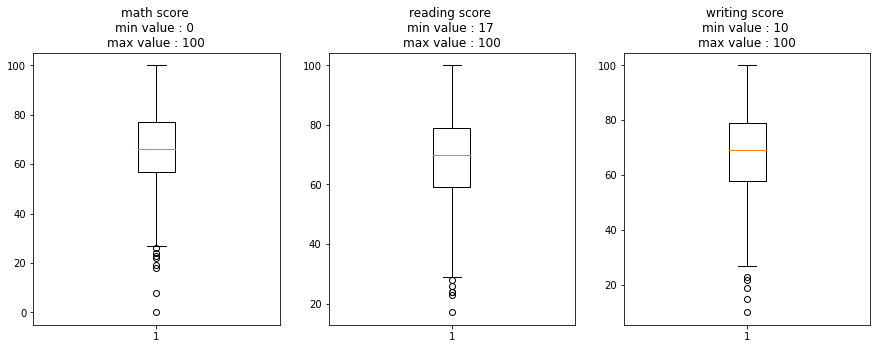

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.boxplot(student_per['math score'])
plt.title("math score \nmin value : {} \nmax value : {}".format(student_per['math score'].min() , 
                                                              student_per['math score'].max()))
plt.subplot(1,3,2)
plt.boxplot(student_per['reading score'])
plt.title("reading score \nmin value : {} \nmax value : {}".format(student_per['reading score'].min() , 
                                                              student_per['reading score'].max()))
plt.subplot(1,3,3)
plt.boxplot(student_per['writing score'])
plt.title("writing score \nmin value : {} \nmax value : {}".format(student_per['writing score'].min() , 
                                                              student_per['writing score'].max()))
plt.show()

In [8]:
student_per.groupby(by='gender')['reading score'].mean()

gender
female    72.608108
male      65.473029
Name: reading score, dtype: float64

In [9]:
student_per.groupby(by='parental level of education')['reading score'].mean()

parental level of education
associate's degree    70.927928
bachelor's degree     73.000000
high school           64.704082
master's degree       75.372881
some college          69.460177
some high school      66.938547
Name: reading score, dtype: float64

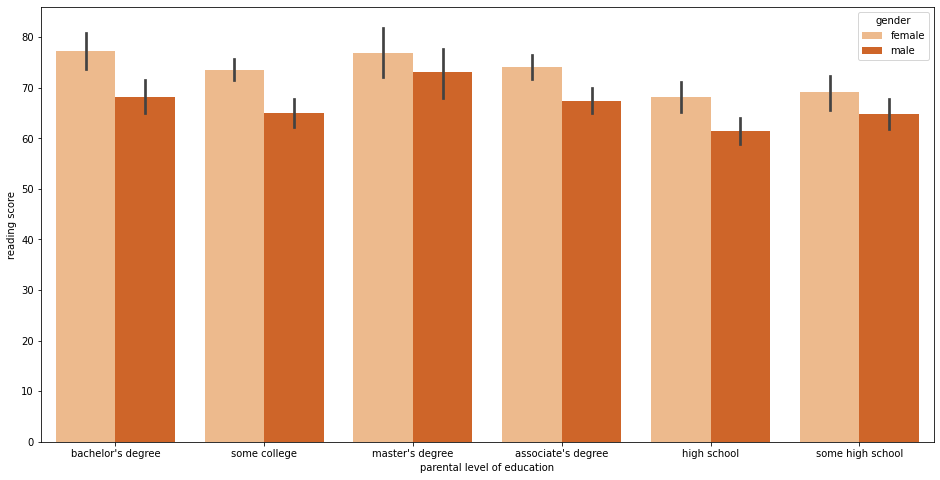

In [10]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'parental level of education' , y = 'reading score' , hue = 'gender', data = student_per , palette = 'Oranges')
plt.show()

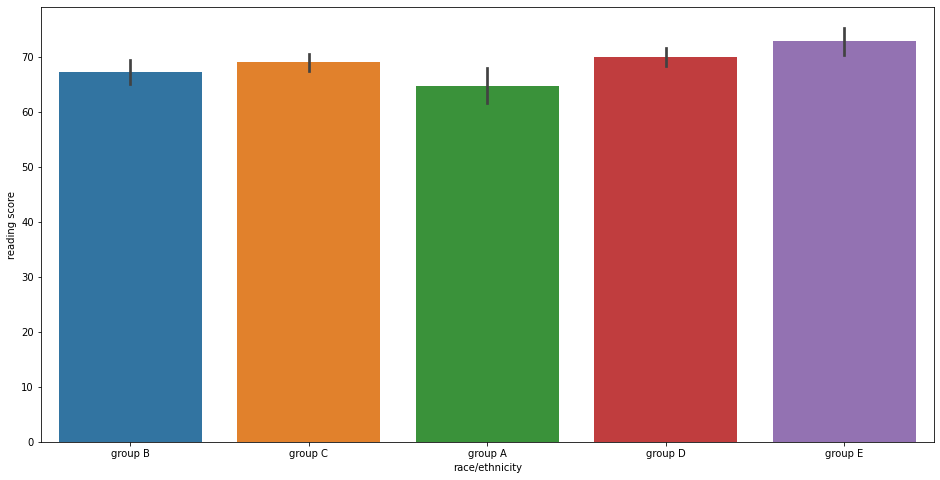

In [11]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'race/ethnicity' , y = 'reading score' , data = student_per)
plt.show()

In [12]:
student_per['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [13]:
student_per['is_male'] = pd.get_dummies(student_per['gender'] , drop_first = True)
student_per['test_pre_course'] = student_per['test preparation course'].replace({'none' : 0 , 
                                                                                 'completed' : 1})


In [14]:
student_per['ethnicity'] = student_per['race/ethnicity'].replace({'group A' : 0 , 
                                                                  'group B' : 1 ,
                                                                  'group C' : 2,
                                                                  'group D' : 3 ,
                                                                  'group E' : 4 })

In [15]:
student_per['parent_education'] = student_per['parental level of education'].replace({'some high school' : 0,
                                                       "high school" : 1,
                                                       "some college" : 2,
                                                       "associate's degree" : 3,
                                                       "bachelor's degree" : 4,
                                                       "master's degree" : 5})

In [16]:
student_per

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,is_male,test_pre_course,ethnicity,parent_education
0,female,group B,bachelor's degree,standard,none,72,72,74,0,0,1,4
1,female,group C,some college,standard,completed,69,90,88,0,1,2,2
2,female,group B,master's degree,standard,none,90,95,93,0,0,1,5
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,3
4,male,group C,some college,standard,none,76,78,75,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0,1,4,5
996,male,group C,high school,free/reduced,none,62,55,55,1,0,2,1
997,female,group C,high school,free/reduced,completed,59,71,65,0,1,2,1
998,female,group D,some college,standard,completed,68,78,77,0,1,3,2


In [17]:
student_per.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'is_male', 'test_pre_course', 'ethnicity',
       'parent_education'],
      dtype='object')

# MODEL 1

In [18]:
X = student_per[['is_male' ,'reading score','test_pre_course']]
Y = student_per['writing score']
X = sm.add_constant(X)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [20]:
results = sm.OLS(Y_train , X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          writing score   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     3214.
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        20:04:22   Log-Likelihood:                -2287.7
No. Observations:                 800   AIC:                             4583.
Df Residuals:                     796   BIC:                             4602.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.6677      0.798      3.344      0.001       1.102       4.234
is_male            -2.4640      0.311     -7.920      0.000      -3.075      -1.853
reading score       0.9458      0.011     86.582      0.000       0.924       0.967
test_pre_course     3.0004      0.323      9.282      0.000       2.366       3.635
==============================================================================
Omnibus:                        2.943   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.733
Skew:                           0.082   Prob(JB):                        0.255
Kurtosis:                       2.765   Cond. No.                         383.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
prediction_1 = results.predict(X_test)
prediction_1

383    49.012802
67     70.766622
475    77.550295
687    73.977547
843    76.032129
         ...    
723    45.602999
644    61.681910
121    87.381948
351    54.115364
95     79.815402
Length: 200, dtype: float64

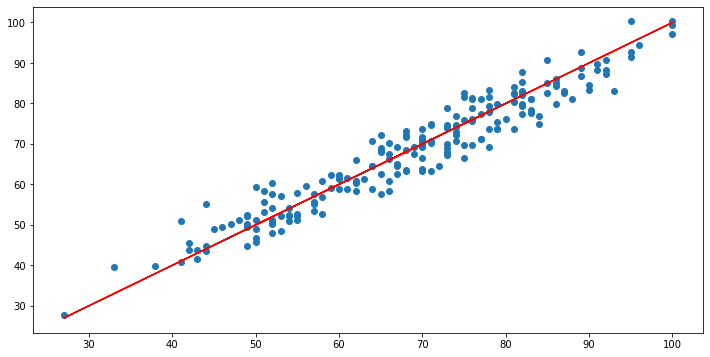

TEST SET

Mean absolute error of the prediction is: 3.212130313277151
Mean squared error of the prediction is: 16.08592514703799
Root mean squared error of the prediction is: 4.010726261793241
Mean absolute percentage error of the prediction is: 4.9078551650069375


In [22]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test , prediction_1)
plt.plot(Y_test , Y_test , color = 'red')
plt.show()
print("TEST SET\n")
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, prediction_1)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, prediction_1)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, prediction_1)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - prediction_1) / Y_test)) * 100))

In [23]:
prediction_train1 = results.predict(X_train)

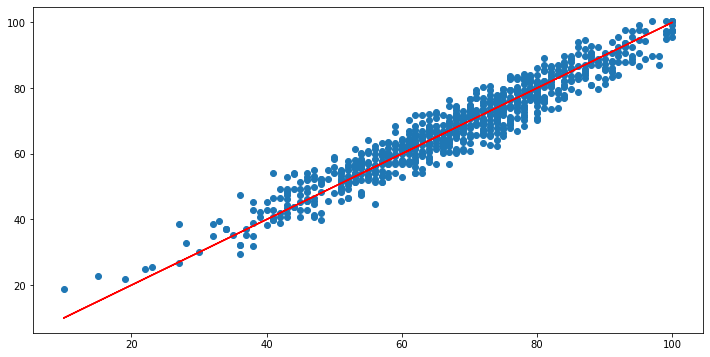

TRAİN SET

Mean absolute error of the prediction is: 3.4077754297207434
Mean squared error of the prediction is: 17.840716458518667
Root mean squared error of the prediction is: 4.223827228772345
Mean absolute percentage error of the prediction is: 5.491393077885536


In [24]:
plt.figure(figsize=(12,6))
plt.scatter(Y_train , prediction_train1)
plt.plot(Y_train , Y_train , color = 'red')
plt.show()
print("TRAİN SET\n")
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_train, prediction_train1)))
print("Mean squared error of the prediction is: {}".format(mse(Y_train, prediction_train1)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_train, prediction_train1)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_train - prediction_train1) / Y_train)) * 100))

# MODEL 2

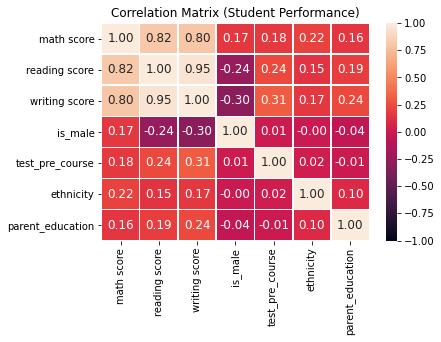

In [25]:
corr = student_per.corr()
sns.heatmap(corr , annot=True, fmt='.2f', annot_kws={"size": 12}, linewidths=.5, vmin=-1, vmax=1,)
plt.title("Correlation Matrix (Student Performance)")
plt.show()

In [26]:
X = student_per[['is_male' ,'reading score','test_pre_course','math score']]
Y = student_per['writing score']
X = sm.add_constant(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)
results = sm.OLS(Y_train , X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          writing score   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3079.
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        20:04:39   Log-Likelihood:                -2196.1
No. Observations:                 800   AIC:                             4402.
Df Residuals:                     795   BIC:                             4426.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.0518      0.718      5.641      0.000       2.642       5.462
is_male            -5.8524      0.365    -16.039      0.000      -6.569      -5.136
reading score       0.6770      0.021     31.985      0.000       0.635       0.719
test_pre_course     3.3559      0.290     11.591      0.000       2.788       3.924
math score          0.2832      0.020     14.308      0.000       0.244       0.322
==============================================================================
Omnibus:                        2.356   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.308   Jarque-Bera (JB):                2.210
Skew:                           0.064   Prob(JB):                        0.331
Kurtosis:                       2.776   Cond. No.                         540.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
prediction_2 = results.predict(X_test)
prediction_train2 = results.predict(X_train)
print("TEST SET\nRoot mean squared error of the prediction is: {}".format(rmse(Y_test, prediction_2)))
print("--"*40)
print("TRAİN SET\nRoot mean squared error of the prediction is: {}".format(rmse(Y_train, prediction_train2)))

TEST SET
Root mean squared error of the prediction is: 3.637978409985482
--------------------------------------------------------------------------------
TRAİN SET
Root mean squared error of the prediction is: 3.7665984851809315


# MODEL 3

In [28]:
student_per['parentxreading_score'] = student_per['parent_education'] * student_per['reading score']

In [29]:
X = student_per[['is_male' ,'reading score','test_pre_course','math score','parentxreading_score']]
Y = student_per['writing score']
X = sm.add_constant(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)
results = sm.OLS(Y_train , X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          writing score   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     2587.
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        20:05:03   Log-Likelihood:                -2177.1
No. Observations:                 800   AIC:                             4366.
Df Residuals:                     794   BIC:                             4394.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.6650      0.709      6.581      0.000       3.274       6.056
is_male                 -5.8448      0.357    -16.393      0.000      -6.545      -5.145
reading score            0.6519      0.021     30.935      0.000       0.611       0.693
test_pre_course          3.4301      0.283     12.114      0.000       2.874       3.986
math score               0.2822      0.019     14.591      0.000       0.244       0.320
parentxreading_score     0.0078      0.001      6.217      0.000       0.005       0.010
==============================================================================
Omnibus:                        2.323   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                2.157
Skew:                           0.056   Prob(JB):                        0.340
Kurtosis:                       2.772   Cond. No.                     1.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
prediction_3 = results.predict(X_test)
prediction_train3 = results.predict(X_train)
print("TEST SET\nRoot mean squared error of the prediction is: {}".format(rmse(Y_test, prediction_3)))
print("--"*40)
print("TRAİN SET\nRoot mean squared error of the prediction is: {}".format(rmse(Y_train, prediction_train3)))

TEST SET
Root mean squared error of the prediction is: 3.4663162546851702
--------------------------------------------------------------------------------
TRAİN SET
Root mean squared error of the prediction is: 3.6781473924874013


# KNN

In [31]:
X = student_per[['is_male' ,'reading score','test_pre_course','math score','parentxreading_score']]
Y = student_per['writing score']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [32]:
knn = neighbors.KNeighborsRegressor()

In [33]:
parameters = {'n_neighbors': range(10),
              'weights': ['distance', 'uniform']
             }

In [34]:
grid_cv = GridSearchCV(estimator=knn,
                       param_grid = parameters,
                       cv = 5)

grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(0, 10),
                         'weights': ['distance', 'uniform']})

In [63]:
grid_cv.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [36]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 6 , weights='distance')
knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=6, weights='distance')

In [37]:
prediction_4 = knn.predict(X_test)
print("TEST SET\nRoot mean squared error of the prediction is: {}".format(rmse(Y_test,prediction_4 )))


TEST SET
Root mean squared error of the prediction is: 4.870544191577362


# XGBoost

In [39]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,Y_train)
prediction_5 = xg_reg.predict(X_test)
prediction_train5 = xg_reg.predict(X_train)
print("Root mean squared error of the prediction is: {}".format(np.sqrt(mean_squared_error(Y_test,prediction_5 ))))

Root mean squared error of the prediction is: 4.171077231423841


In [40]:
xg_reg = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [1,2,3,4,5,6,7,8,9,10],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
xgb_grid = GridSearchCV(xg_reg , parameters , cv = 2 , n_jobs = 5 , verbose=True)

xgb_grid.fit(X_train , Y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.1s
[Parallel(n_jobs=5)]: Done  60 out of  60 | elapsed:   16.4s finished


0.9297022601539322
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 1, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.7}


In [41]:
xg_reg = xgb.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.07, max_depth= 1, min_child_weight= 4,
                          n_estimators= 500,
                          objective= 'reg:squarederror', subsample= 0.7)
xg_reg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=1,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
prediction_5 = xg_reg.predict(X_test)
prediction_train5 = xg_reg.predict(X_train)
print("Root mean squared error of the prediction is: {}".format(np.sqrt(mean_squared_error(Y_test,prediction_5 ))))

Root mean squared error of the prediction is: 3.3734085113444103
